## Observations and Insights 

Work in Progress: 
1. Cell 10 - Summary Statistics indicate - ?? (Ketrapil - Highest Variance, Std. Error)
2. distribution of female versus male specimens--- Almost equal - 49.8 vs 50.2
3. Quartile distribuation - Infubinol outliers causing the data to be skewed.
4. Capumolin & Ramicane Drug treatments are the best for drug treatment, Lower tumor volume
5. Tumor volume reduces as the treatment time increases for Capumolin
6. positive and high correlation coefficient within the Average Tumor volume and mouse weight.

In [1]:
# Include this line to make plots interactive
#%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_combined_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
mouse_study_combined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mice_count = len(mouse_study_combined_df['Mouse ID'].value_counts())
print(f"The number of mice from the combined dataset: {mice_count}")

The number of mice from the combined dataset: 249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
#mouse_study_combined_df.duplicated(subset=['Mouse ID','Timepoint'])

mouse_study_combined_df.loc[mouse_study_combined_df.duplicated(subset=['Mouse ID','Timepoint']), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_combined_df.loc[mouse_study_combined_df.duplicated(subset=['Mouse ID'])]



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mousedata_df=mouse_study_combined_df.drop_duplicates(subset=['Mouse ID','Timepoint'],keep="first")
clean_mousedata_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
#Ensuring that there are no duplicates
clean_mousedata_df.loc[clean_mousedata_df.duplicated(subset=['Mouse ID','Timepoint']), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [8]:
#Checking on removal of duplicated rows (Eg: Rows 913, 915,917)
clean_mousedata_df.head(915)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1


In [9]:
# Checking the number of mice in the clean DataFrame.
updated_mice_count = len(clean_mousedata_df['Mouse ID'].value_counts())
print(f"The number of mice from the combined dataset: {updated_mice_count}")

The number of mice from the combined dataset: 249


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_tumor = clean_mousedata_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor = clean_mousedata_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_tumor = clean_mousedata_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_tumor = clean_mousedata_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_tumor = clean_mousedata_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor,
                              "Median Tumor Volume": median_tumor,
                              "Tumor Volume Variance": var_tumor,
                              "Tumor Volume Standard Dev." :std_tumor, 
                              "Tumor Volume Standard Error" :sem_tumor})
            
                                
summary_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Dev.,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

# ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html


new_summary_df = clean_mousedata_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg([('Mean Tumor Volume', 'mean'), ('Median Tumor Volume', 'median'), ('Tumor Volume Variance', 'var'), ('Tumor Volume Standard Dev.', 'std'), ('Tumor Volume Standard Error', 'sem')])
new_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Dev.,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

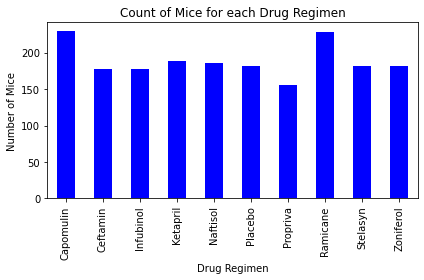

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

Total_Timepoint_MiceTested = clean_mousedata_df.groupby(["Drug Regimen"])["Timepoint"].count()
Total_Timepoint_MiceTested.plot(kind="bar",title="Count of Mice for each Drug Regimen",color="blue")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.tight_layout()
plt.show()


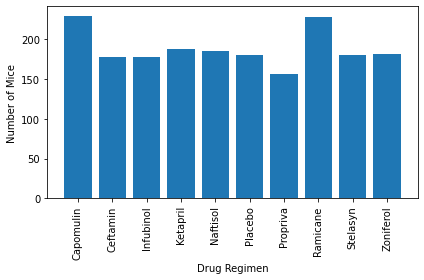

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# ref: Total_Timepoint_MiceTested = clean_mousedata_df.groupby(["Drug Regimen"])["Timepoint"].count()

x_axis = Total_Timepoint_MiceTested.index
y_axis = Total_Timepoint_MiceTested
plt.bar(x_axis, y_axis)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()


In [14]:
#checking on the gendertotal across the dataframe
mouse_gender_count = clean_mousedata_df.groupby(["Sex"]).count()
mouse_gender_count

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,930,930,930,930,930,930,930
Male,958,958,958,958,958,958,958


In [15]:
#checking on the gendertotal across the dataframe for unique Mouse IDs
#Ref : https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html
mouse_gender_unique= clean_mousedata_df.groupby(["Sex"]).nunique()["Mouse ID"]
print(mouse_gender_unique)

gender_percent_unique = mouse_gender_unique/(clean_mousedata_df.groupby(["Sex"]).nunique()["Mouse ID"].sum())*100
print(gender_percent_unique)

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64
Sex
Female    49.799197
Male      50.200803
Name: Mouse ID, dtype: float64


        Mouse ID  Percentage
Sex                         
Female       124   49.799197
Male         125   50.200803


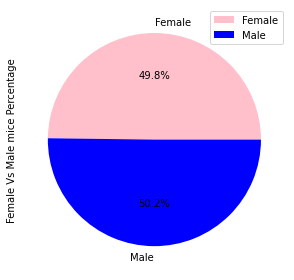

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender_uniqcount_df = pd.DataFrame({"Mouse ID": mouse_gender_unique,"Percentage":gender_percent_unique})
print(mouse_gender_uniqcount_df)

mouse_gender_uniqcount_df.plot(kind="pie", y="Percentage", colors = ['pink', 'blue'],autopct= "%1.1f%%")
plt.ylabel("Female Vs Male mice Percentage")
plt.tight_layout()
plt.show()


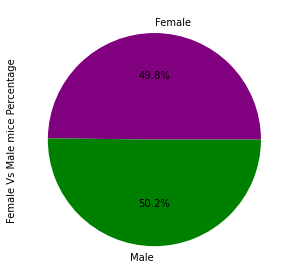

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mouse_gender_uniqcount_df["Percentage"], labels=["Female","Male"], colors= ['purple', 'green'], autopct="%1.1f%%")
plt.ylabel("Female Vs Male mice Percentage")
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mousedata_df.groupby(["Mouse ID"]).max()["Timepoint"]
print(last_timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_df = pd.DataFrame(last_timepoint)
tumor_volume_final_df = pd.merge(clean_mousedata_df,last_timepoint_df,on=("Mouse ID","Timepoint"))
tumor_volume_final_df

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin

mouse_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    #The interquartile range is a measure of where the “middle fifty” is in a data set. 
    #/Where a range is a measure of where the beginning and end are in a set, '
    #/an interquartile range is a measure of where the bulk of the values lie
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset

for treatments in mouse_treatments:
    tumor_vol = tumor_volume_final_df.loc[tumor_volume_final_df["Drug Regimen"] == treatments,"Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_vol)

# Determine outliers using upper and lower bounds

for drug in mouse_treatments:
    index = mouse_treatments.index(drug)
    quartiles=tumor_vol_data[index].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print("Drug Regimen:" + mouse_treatments[index])
    print(f"The lower quartile of the Drug Regimen is: {lowerq}")
    print(f"The upper quartile of the Drug Regimen is: {upperq}")
    print(f"The interquartile range of the Drug Regimen is: {iqr}")
    print(f"The the median of the Drug Regimen is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("------------------------------------------------------------")
    print("------------------------------------------------------------")
    


Drug Regimen:Capomulin
The lower quartile of the Drug Regimen is: 32.37735684
The upper quartile of the Drug Regimen is: 40.1592203
The interquartile range of the Drug Regimen is: 7.781863460000004
The the median of the Drug Regimen is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
------------------------------------------------------------
------------------------------------------------------------
Drug Regimen:Ramicane
The lower quartile of the Drug Regimen is: 31.56046955
The upper quartile of the Drug Regimen is: 40.65900627
The interquartile range of the Drug Regimen is: 9.098536719999998
The the median of the Drug Regimen is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
------------------------------------------------------------
------------------------------------------------------------
Drug Regimen:Infubinol
The lower quartile of the Drug Regimen is: 54

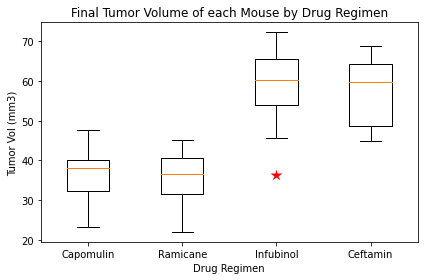

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Ref: https://matplotlib.org/stable/gallery/statistics/boxplot.html

flierprops = dict(marker='*', markerfacecolor='red', markersize=12,
                  markeredgecolor='none')
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of each Mouse by Drug Regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Vol (mm3)')
ax1.boxplot(tumor_vol_data, flierprops=flierprops)
plt.xticks([1,2,3,4],mouse_treatments)
plt.tight_layout()
plt.show()

## Line and Scatter Plots

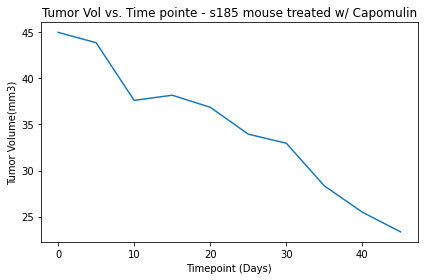

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#capomulin_data = clean_mousedata_df.loc[clean_mousedata_df["Drug Regimen"] == 'Capomulin']

# line plot of tumor volume vs. time pointe for s185 mouse treated with Capomulin
x_axis=clean_mousedata_df.loc[clean_mousedata_df["Mouse ID"] == "s185"]
x_axis = x_axis["Timepoint"]
y_axis=clean_mousedata_df.loc[clean_mousedata_df["Mouse ID"] == "s185"]
y_axis = y_axis["Tumor Volume (mm3)"]
plt.plot(x_axis,y_axis)  
plt.title("Tumor Vol vs. Time pointe - s185 mouse treated w/ Capomulin")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume(mm3)")
plt.tight_layout()
plt.show()

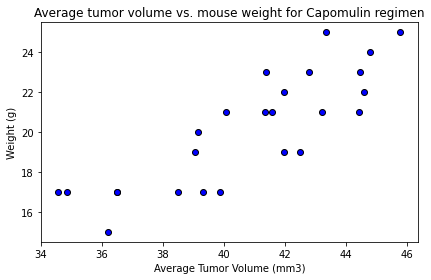

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = clean_mousedata_df.loc[clean_mousedata_df["Drug Regimen"] == 'Capomulin']
capomulin_data_avg = capomulin_data.groupby(['Mouse ID']).mean()
tumor_volume = capomulin_data_avg["Tumor Volume (mm3)"]
mouse_weight = capomulin_data_avg["Weight (g)"]

plt.scatter(tumor_volume,mouse_weight, facecolors="blue", edgecolors="black")
plt.title("Average tumor volume vs. mouse weight for Capomulin regimen")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.tight_layout()
plt.show()

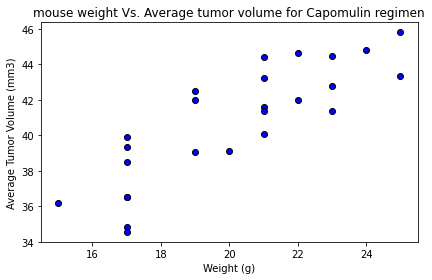

In [23]:
# Generate a scatter plot of mouse weight vs. Average Tumor Volume for the Capomulin regimen
capomulin_data = clean_mousedata_df.loc[clean_mousedata_df["Drug Regimen"] == 'Capomulin']
capomulin_data_avg = capomulin_data.groupby(['Mouse ID']).mean()
tumor_volume = capomulin_data_avg["Tumor Volume (mm3)"]
mouse_weight = capomulin_data_avg["Weight (g)"]

plt.scatter(mouse_weight,tumor_volume,facecolors="blue", edgecolors="black")
plt.title("mouse weight Vs. Average tumor volume for Capomulin regimen")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


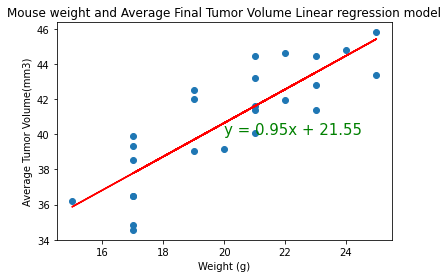

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(mouse_weight, tumor_volume)
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(correlation[0],2)}")

x_axis = capomulin_data_avg["Weight (g)"]
y_axis = capomulin_data_avg["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="green")
plt.title("Mouse weight and Average Final Tumor Volume Linear regression model")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume(mm3)")
plt.show()
